In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input # model image classification pretrained
#from keras.applications.vgg16 import VGG16 
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential  
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
train_path = r"C:\Users\Dell\Downloads\dog_cat\dog_cat\train" #dataset required train path and test path
valid_path = r"C:\Users\Dell\Downloads\dog_cat\dog_cat\test"

In [4]:
folders = glob(r'C:\Users\Dell\Downloads\dog_cat\dog_cat\train\*') #dataset in types of classes
folders

['C:\\Users\\Dell\\Downloads\\dog_cat\\dog_cat\\train\\cats',
 'C:\\Users\\Dell\\Downloads\\dog_cat\\dog_cat\\train\\dogs']

In [5]:
inception_model = Sequential()  

pretrained_model=  InceptionV3(include_top=False,  #pretrain model load 
                   input_shape=(224,224,3),   #image shape 3-RGB channel
                   pooling='avg',classes=2,   #pooling method
                   weights='imagenet')     #weights-given dataset used
for layer in pretrained_model.layers:    #avoid backpropagation not update  wights
        layer.trainable=False            #non traineable parameters

inception_model.add(pretrained_model) #add pretrained model
inception_model.add(Flatten()) #converting 8 D to 1D
inception_model.add(Dense(512, activation='relu')) #dense-hidden layer 
inception_model.add(Dense(2, activation='softmax')) #2-becz two classes

87910968/87910968 [==============================] - 12s 0us/step


In [6]:
inception_model.summary() #gives summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 1026      
 apper)                                                          
                                                                 
Total params: 22852898 (87.18 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 21802784 (83.17 MB)
__________

In [7]:
inception_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #compile the model 

In [9]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory
#     seed=123,
#     shuffle=True,
#     image_size=(224,224),
#     batch_size=32
# )


img_height,img_width=224,224  #for training data 
batch_size=32 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'C:\Users\Dell\Downloads\dog_cat\dog_cat\train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 557 files belonging to 2 classes.


In [33]:
#for test data - preprocess the data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'C:\Users\Dell\Downloads\dog_cat\dog_cat\test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 140 files belonging to 2 classes.


In [34]:
epochs=10 
history = inception_model.fit(        #model train
  train_ds,
  validation_data=test_ds,   
  epochs=epochs
)                                       #model accu-83

Epoch 1/10
5/5 [==============================] - 36s 5s/step - loss: 38.0960 - accuracy: 0.4500 - val_loss: 25.8574 - val_accuracy: 0.5571
Epoch 2/10
5/5 [==============================] - 18s 4s/step - loss: 18.7897 - accuracy: 0.5786 - val_loss: 7.1934 - val_accuracy: 0.6500
Epoch 3/10
5/5 [==============================] - 18s 4s/step - loss: 10.0445 - accuracy: 0.6143 - val_loss: 5.9045 - val_accuracy: 0.6500
Epoch 4/10
5/5 [==============================] - 18s 4s/step - loss: 7.7823 - accuracy: 0.6071 - val_loss: 6.9840 - val_accuracy: 0.6571
Epoch 5/10
5/5 [==============================] - 24s 5s/step - loss: 4.7479 - accuracy: 0.6357 - val_loss: 1.8321 - val_accuracy: 0.7714
Epoch 6/10
5/5 [==============================] - 24s 5s/step - loss: 3.5398 - accuracy: 0.7214 - val_loss: 4.1042 - val_accuracy: 0.6286
Epoch 7/10
5/5 [==============================] - 18s 4s/step - loss: 3.5102 - accuracy: 0.6500 - val_loss: 1.4253 - val_accuracy: 0.7929
Epoch 8/10
5/5 [==============

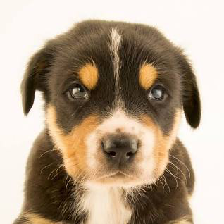

In [11]:
img=image.load_img(r'C:\Users\Dell\Downloads\download.jpg',target_size=(224,224)) #random eg. & gives accuracy
img

In [12]:
x=image.img_to_array(img)  #image to array convert
x

array([[[252., 247., 241.],
        [252., 247., 241.],
        [252., 247., 241.],
        ...,
        [254., 249., 246.],
        [254., 249., 246.],
        [254., 249., 246.]],

       [[252., 247., 241.],
        [252., 247., 241.],
        [252., 247., 241.],
        ...,
        [254., 249., 246.],
        [254., 249., 246.],
        [254., 249., 246.]],

       [[252., 247., 241.],
        [252., 247., 241.],
        [252., 247., 241.],
        ...,
        [254., 249., 246.],
        [254., 249., 246.],
        [254., 249., 246.]],

       ...,

       [[252., 245., 237.],
        [252., 245., 237.],
        [252., 245., 237.],
        ...,
        [254., 249., 246.],
        [254., 249., 246.],
        [254., 249., 246.]],

       [[252., 245., 237.],
        [252., 245., 237.],
        [252., 245., 237.],
        ...,
        [254., 249., 246.],
        [254., 249., 246.],
        [254., 249., 246.]],

       [[252., 245., 237.],
        [252., 245., 237.],
        [252., 2

In [13]:
x = x/255     #normalize the array
x

array([[[0.9882353 , 0.96862745, 0.94509804],
        [0.9882353 , 0.96862745, 0.94509804],
        [0.9882353 , 0.96862745, 0.94509804],
        ...,
        [0.99607843, 0.9764706 , 0.9647059 ],
        [0.99607843, 0.9764706 , 0.9647059 ],
        [0.99607843, 0.9764706 , 0.9647059 ]],

       [[0.9882353 , 0.96862745, 0.94509804],
        [0.9882353 , 0.96862745, 0.94509804],
        [0.9882353 , 0.96862745, 0.94509804],
        ...,
        [0.99607843, 0.9764706 , 0.9647059 ],
        [0.99607843, 0.9764706 , 0.9647059 ],
        [0.99607843, 0.9764706 , 0.9647059 ]],

       [[0.9882353 , 0.96862745, 0.94509804],
        [0.9882353 , 0.96862745, 0.94509804],
        [0.9882353 , 0.96862745, 0.94509804],
        ...,
        [0.99607843, 0.9764706 , 0.9647059 ],
        [0.99607843, 0.9764706 , 0.9647059 ],
        [0.99607843, 0.9764706 , 0.9647059 ]],

       ...,

       [[0.9882353 , 0.9607843 , 0.92941177],
        [0.9882353 , 0.9607843 , 0.92941177],
        [0.9882353 , 0

In [14]:
import numpy as np         #resize the image shape
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [15]:
pred = inception_model.predict(img_data) #image load
pred  #op-predict into 2 class

1/1 [==============================] - 2s 2s/step


array([[0.45067143, 0.54932857]], dtype=float32)

In [16]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [17]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is dogs
